In [26]:
# import dependencies 
import matplotlib.pyplot as plt 
import plotly.express as px 
import numpy as np 
import seaborn as sns 
import pandas as pd

## Simple Linear Regression

#### Implementation using Sci-kit Learn

In [2]:
# import machine learning packages 
from sklearn.linear_model import LinearRegression

In [ ]:
# Simulate data
N = 100
X = 2*np.random.rand(N, 1)
y = 4 + 3*X + np.random.randn(N, 1)

X_flattened = X.flatten()
y_flattened = y.flatten()

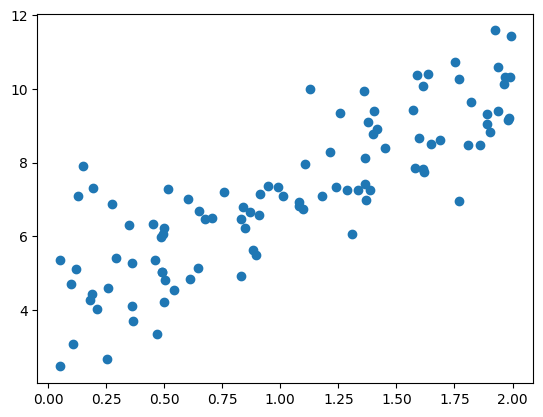

In [73]:
fig = plt.scatter(x=X_flattened, y=y_flattened)

In [74]:
model = LinearRegression()

In [75]:
inputs = X
targets = y_flattened

print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (100, 1)
targes.shape : (100,)


In [76]:
model.fit(inputs, targets)

LinearRegression()

In [81]:
print(f"Co-efficient: {model.coef_[0]} and Intercept: {model.intercept_}")

Co-efficient: 2.881407431941261 and Intercept: 4.202284212929069


In [82]:
def try_parameters(w, b):
    X_flattened = X.flatten()
    y_flattened = y.flatten()
    predictions = line(X_flattened, w, b)
    
    plt.plot(X_flattened, predictions, 'r', alpha=0.9);
    plt.scatter(X_flattened, y_flattened, s=8,alpha=0.8);
    plt.xlabel('X');
    plt.ylabel('Y')
    plt.legend(['Prediction', 'Actual']);

def line(X, w, b): 
    return b + w * X

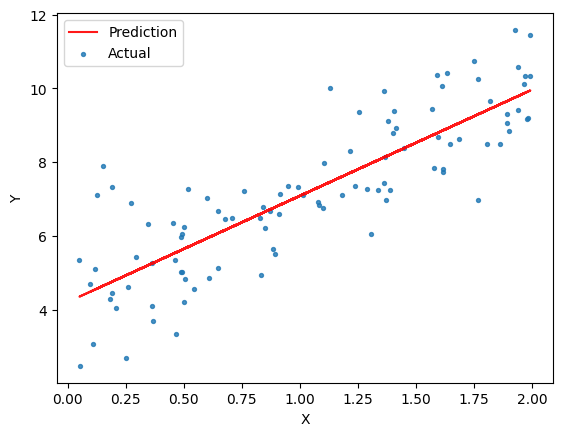

In [83]:
try_parameters(model.coef_, model.intercept_)

In [71]:
# to measure performance lets calculate the MSE and R^2 

def MSE(y, x, w, b): 
    return np.mean(np.square(y-b-w*x))

print(MSE(y_flattened, X_flattened, model.coef_, model.intercept_))

def R_squared(X,y): 
    return model.score(X,y)

print(R_squared(X, y_flattened))

1.0002305304461718
0.7498871991684136


#### Implementation using normal equation and the feature matrix 

In [87]:
column_of_ones = np.ones((N, 1))

feature_matrix = np.concatenate((column_of_ones, X), axis=1)

xtx_inverse = np.linalg.inv(np.matmul(feature_matrix.T, feature_matrix))

xty = np.matmul(feature_matrix.T, y)

result = np.matmul(xtx_inverse, xty)

result

array([[4.20228421],
       [2.88140743]])

In [89]:
print(f"Co-efficient: {result[0][0]} and Intercept: {result[1][0]}")


Co-efficient: 4.202284212929069 and Intercept: 2.881407431941259


## Polynomial Regression (1 Dimension)

#### Implementation using sk-learn

Original:  [1.75846514]
Polynomial:  [1.75846514 3.09219965]
Co-efficient: [0.07721843 4.90371795] and Intercept: [4.22897069]


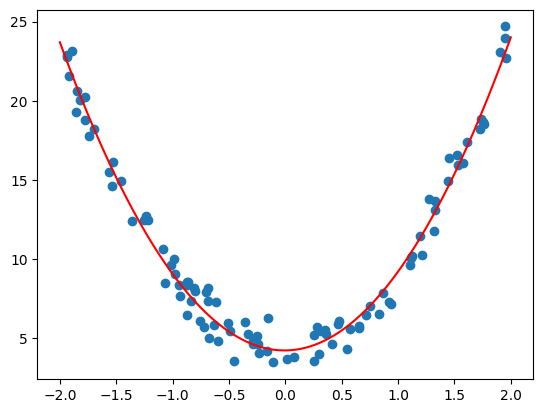

In [171]:
N_p = 100
X_p = 4*np.random.rand(N_p, 1) - 2
y_p = 4 + 5 * X_p**2 + np.random.randn(N_p, 1)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_p)
print("Original: ", X_p[0])
print("Polynomial: ", X_poly[0])

polynomial_model = LinearRegression()

polynomial_model.fit(X_poly, y_p)

print(f"Co-efficient: {polynomial_model.coef_[0]} and Intercept: {polynomial_model.intercept_}")

x_vals = np.linspace(-2,2,100).reshape(-1,1) # important in plotting the polynomial function 
x_vals_poly = poly_features.transform(x_vals)
y_vals = polynomial_model.predict(x_vals_poly)

plt.scatter(X_p, y_p)
plt.plot(x_vals, y_vals, color="r")
plt.show()


#### Implementation using feature matrices